In [1]:
%%html
<link href='https://fonts.googleapis.com/css?family=Roboto' rel='stylesheet'>
<style>
body {
    font-family: 'Roboto', 'Helvetica', sans-serif; 
    font-size: 16px;
}
</style>

<div style="background-color: #2b3237; padding-top: 20px;
  padding-right: 30px;
  padding-bottom: 10px;
  padding-left: 30px; width: 100%; display: flex">

<div style="background-color: #2b3237; padding-top: 20px;
  padding-right: 30px;
  padding-bottom: 20px;
  padding-left: 0px; width: 100%">

<font color=#ffffff size=6> <strong>Regional Voting Preferences in the 2016 Philippine Elections</strong> </font>
</div>
</div>

<div style="background-color: #e9e6e3; padding-top: 20px;
  padding-right: 15px;
  padding-bottom: 20px;
  padding-left: 30px">
<font color=#2b3237> <strong> George Allan Esleta (gesleta@aim.edu) </strong></font>
</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import geopandas as gpd
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<div><span style="background-color: #2b3237; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #43a1e5; font-size: 20px; font-weight: bold">TASK </span></div>

1.	Create a denormalized table replacing `precinct_code` in the `results_*.csv` files with the columns: region, province, municipality, and barangay. 
2.	Create an interesting data visualization using this dataset.

<div><span style="background-color: #2b3237; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #43a1e5; font-size: 20px; font-weight: bold">DATA </span></div>

There are three (3) data sources, namely:

- `ref_table_precinct_locations_PSGC.csv` – lookup table for precincts
- `results_president.csv` – precinct-level election results for the 2016 presidential race
- `results_vice-president.csv` – precinct-level election results for the 2016 vice presidential race

## 1. Precinct Data

Workflow:
1. Load precinct data
2. Check data columns
3. Check for missing/ null values

### a. Load precint data

In [151]:
df_precinct = pd.read_csv('Datasets/ref_table_precinct_locations_PSGC.csv') 

In [152]:
df_precinct.head()

,Unnamed: 0,precinct_code,region,province,municipality,barangay,registered_voters,ballots_cast,PSGC_CM,is_city,income_class,population,land_area,province_CM,municipality_CM
0,0,55170026,REGION I,PANGASINAN,CALASIAO,BUENLAG,592,503,15517000,0.0,1st,91109.0,4836.0,PANGASINAN,CALASIAO
1,1,55170027,REGION I,PANGASINAN,CALASIAO,BUENLAG,526,458,15517000,0.0,1st,91109.0,4836.0,PANGASINAN,CALASIAO
2,2,55170023,REGION I,PANGASINAN,CALASIAO,BUENLAG,723,649,15517000,0.0,1st,91109.0,4836.0,PANGASINAN,CALASIAO
3,3,55170022,REGION I,PANGASINAN,CALASIAO,BUENLAG,768,650,15517000,0.0,1st,91109.0,4836.0,PANGASINAN,CALASIAO
4,4,55170025,REGION I,PANGASINAN,CALASIAO,BUENLAG,787,662,15517000,0.0,1st,91109.0,4836.0,PANGASINAN,CALASIAO


### b. Check data columns

In [153]:
df_precinct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90642 entries, 0 to 90641
Data columns (total 15 columns):
Unnamed: 0           90642 non-null int64
precinct_code        90642 non-null int64
region               90642 non-null object
province             90642 non-null object
municipality         90642 non-null object
barangay             90642 non-null object
registered_voters    90642 non-null int64
ballots_cast         90642 non-null int64
PSGC_CM              90642 non-null object
is_city              90642 non-null float64
income_class         90159 non-null object
population           58644 non-null float64
land_area            90159 non-null float64
province_CM          90642 non-null object
municipality_CM      90642 non-null object
dtypes: float64(3), int64(4), object(8)
memory usage: 10.4+ MB


There are **90,642** precinct entries in the data. The `precinct` lookup table has the following columns:

In [154]:
df_precinct.shape

(90642, 15)

| Column | Data type | Description |
|---|---|---|
| `precinct_code`  | int | Unique identification number of the precinct |
|`region           ` | categorical | Administrative region where the precinct is located |
|`province         ` |object | Province where the precinct is located |
|`municipality     ` |object | Municipality/City where the precinct is located |
|`barangay         ` |object | Barangay where the precinct is located |
|`registered_voters` |int64  | Number of registered voters in the precinct |
|`ballots_cast     ` |int64  | Number of votes cast in the precinct |
|`PSGC_CM          ` |object | Philippine Standard Geographic Code (PSGC) for the city/municipality |
|`is_city          ` |boolean| True if the LGU is a city |
|`income_class     ` |object | Income class of the city/municipality |
|`population       ` |float64| Population of the city/municipality |
|`land_area        ` |float64| Land area of the city/municipality |
|`province_CM      ` |object | Name of the province in the PSGC database |
|`municipality_CM  ` |object | Name of the municipality/city in the PSGC database |

### c. Check for null values

The precinct data has no missing/ null values for the `precinct_code`, `region`, `province`, `municipality`, and `barangay` columns.

In [155]:
df_precinct.isnull().sum()

Unnamed: 0               0
precinct_code            0
region                   0
province                 0
municipality             0
barangay                 0
registered_voters        0
ballots_cast             0
PSGC_CM                  0
is_city                  0
income_class           483
population           31998
land_area              483
province_CM              0
municipality_CM          0
dtype: int64

### d. Checking for uniqueness and duplicates

The `precinct_code` column has no duplicate values.

In [156]:
df_precinct.nunique(axis=0, dropna=True)

Unnamed: 0           90642
precinct_code        90642
region                  19
province                90
municipality          1454
barangay             26402
registered_voters      771
ballots_cast           793
PSGC_CM               1634
is_city                  3
income_class            14
population            1481
land_area             1576
province_CM             90
municipality_CM       1446
dtype: int64

### e. Check unique values of Region

There are **nineteen (19)** unique regions in the precinct lookup data:

In [157]:
print(f"There are {df_precinct['region'].nunique()} unique administrative regions.")

There are 19 unique administrative regions.


In [158]:
print(sorted(df_precinct['region'].unique()))

['ARMM', 'CAR', 'NCR', 'NIR', 'OAV', 'REGION I', 'REGION II', 'REGION III', 'REGION IV-A', 'REGION IV-B', 'REGION IX', 'REGION V', 'REGION VI', 'REGION VII', 'REGION VIII', 'REGION X', 'REGION XI', 'REGION XII', 'REGION XIII']


Note that ***Overseas Absentee Voters (OAV)*** are considered as a separate administrative region. Also, **Negros Island Region (NIR)**, which was dissolved in 2017, is still included in the database.

### f. Check unique values of Province

There are two (2) province-related columns: `province` and `province_CM`. Checking if there are discrepancies between the two columns:

In [159]:
df_precinct[df_precinct['province_CM'] != df_precinct['province']].shape

(0, 15)

The two columns have identical values for all records and therefore can be used interchangeably. For simplicity, the `province_CM` column will be used, as this is the official name of the province in the PSA records.

There are **ninety (90)** unique `province` values:

In [160]:
print(sorted(df_precinct['province_CM'].unique()))

['ABRA', 'AGUSAN DEL NORTE', 'AGUSAN DEL SUR', 'AKLAN', 'ALBAY', 'ANTIQUE', 'APAYAO', 'ASIA', 'AURORA', 'BASILAN', 'BATAAN', 'BATANES', 'BATANGAS', 'BENGUET', 'BILIRAN', 'BOHOL', 'BUKIDNON', 'BULACAN', 'CAGAYAN', 'CAMARINES NORTE', 'CAMARINES SUR', 'CAMIGUIN', 'CAPIZ', 'CATANDUANES', 'CAVITE', 'CEBU', 'COMPOSTELA VALLEY', 'COTABATO (NORTH COT.)', 'DAVAO (DAVAO DEL NORTE)', 'DAVAO DEL SUR', 'DAVAO OCCIDENTAL', 'DAVAO ORIENTAL', 'DINAGAT ISLANDS', 'EASTERN SAMAR', 'EUROPE', 'GUIMARAS', 'IFUGAO', 'ILOCOS NORTE', 'ILOCOS SUR', 'ILOILO', 'ISABELA', 'KALINGA', 'LA UNION', 'LAGUNA', 'LANAO DEL NORTE', 'LANAO DEL SUR', 'LEYTE', 'MAGUINDANAO', 'MARINDUQUE', 'MASBATE', 'MIDDLE EAST AND AFRICAS', 'MISAMIS OCCIDENTAL', 'MISAMIS ORIENTAL', 'MOUNTAIN PROVINCE', 'NATIONAL CAPITAL REGION - FOURTH DISTRICT', 'NATIONAL CAPITAL REGION - MANILA', 'NATIONAL CAPITAL REGION - SECOND DISTRICT', 'NATIONAL CAPITAL REGION - THIRD DISTRICT', 'NEGROS OCCIDENTAL', 'NEGROS ORIENTAL', 'NORTH AND LATIN AMERICA', 'NORT

### f. Check unique values of Municipality

There are two (2) municipality-related columns: `municipality` and `municipality_CM`. Checking if there are discrepancies between the two columns:

In [161]:
df_precinct[df_precinct['municipality_CM'] != df_precinct['municipality']].shape

(1660, 15)

For the National Capital Region, the `municipality` column contains district names instead of the city name. 

In [162]:
df_precinct[df_precinct['municipality_CM'] != df_precinct['municipality']].head()

,Unnamed: 0,precinct_code,region,province,municipality,barangay,registered_voters,ballots_cast,PSGC_CM,is_city,income_class,population,land_area,province_CM,municipality_CM
80531,80531,39121592,NCR,NATIONAL CAPITAL REGION - MANILA,PANDACAN,BARANGAY 856,768,624,133900000,1.0,1st Class-Special,NaN,2498.0,NATIONAL CAPITAL REGION - MANILA,MANILA
80532,80532,39121576,NCR,NATIONAL CAPITAL REGION - MANILA,PANDACAN,BARANGAY 845,473,395,133900000,1.0,1st Class-Special,NaN,2498.0,NATIONAL CAPITAL REGION - MANILA,MANILA
80533,80533,39121575,NCR,NATIONAL CAPITAL REGION - MANILA,PANDACAN,BARANGAY 845,579,461,133900000,1.0,1st Class-Special,NaN,2498.0,NATIONAL CAPITAL REGION - MANILA,MANILA
80534,80534,39121590,NCR,NATIONAL CAPITAL REGION - MANILA,PANDACAN,BARANGAY 855,314,249,133900000,1.0,1st Class-Special,NaN,2498.0,NATIONAL CAPITAL REGION - MANILA,MANILA
80535,80535,39121591,NCR,NATIONAL CAPITAL REGION - MANILA,PANDACAN,BARANGAY 855,475,397,133900000,1.0,1st Class-Special,NaN,2498.0,NATIONAL CAPITAL REGION - MANILA,MANILA


The `municipality_CM` column will be used moving forward.

### g. Drop `province` and `municipality` columns

In [163]:
df_precinct.drop(['Unnamed: 0', 'province', 'municipality'], axis=1, inplace=True)

### i. Re-mapping of provinces based on shape file labels

In [304]:
ph_provinces = gpd.GeoDataFrame.from_file("Datasets\ph_provinces.shp")

In [305]:
ph_provinces

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,province,REGION,geometry
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,ABRA,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949..."
1,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,AGUSAN DEL NORTE,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509..."
2,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,AGUSAN DEL SUR,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211..."
3,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,AKLAN,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ..."
4,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,ALBAY,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,177,PHL,Philippines,6,Antique,None,None,Lalawigan|Probinsya,Province,ANTIQUE,Western Visayas (Region VI),"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,177,PHL,Philippines,7,Apayao,None,None,Lalawigan|Probinsya,Province,APAYAO,Cordillera Administrative Region (CAR),"POLYGON ((121.33075 17.85327, 121.32558 17.845..."
7,177,PHL,Philippines,8,Aurora,None,None,Lalawigan|Probinsya,Province,AURORA,Central Luzon (Region III),"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,177,PHL,Philippines,9,Basilan,None,None,Lalawigan|Probinsya,Province,BASILAN,Autonomous Region of Muslim Mindanao (ARMM),"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,177,PHL,Philippines,10,Bataan,None,None,Lalawigan|Probinsya,Province,BATAAN,Central Luzon (Region III),"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


In [285]:
#ph_provinces.to_file(driver = 'ESRI Shapefile', filename= "Datasets\ph_provinces.shp")

In [287]:
provinces_precinct = set(df_precinct['province_CM'].unique())

In [288]:
provinces_shape = set(ph_provinces['province'].unique())

In [289]:
provinces_precinct.difference(provinces_shape)

{'ASIA',
 'COTABATO (NORTH COT.)',
 'DAVAO (DAVAO DEL NORTE)',
 'DAVAO OCCIDENTAL',
 'EUROPE',
 'MIDDLE EAST AND AFRICAS',
 'NATIONAL CAPITAL REGION - FOURTH DISTRICT',
 'NATIONAL CAPITAL REGION - MANILA',
 'NATIONAL CAPITAL REGION - SECOND DISTRICT',
 'NATIONAL CAPITAL REGION - THIRD DISTRICT',
 'NORTH AND LATIN AMERICA',
 'SAMAR (WESTERN SAMAR)',
 'TAGUIG - PATEROS'}

In [290]:
provinces_shape.difference(provinces_precinct)

{'DAVAO DEL NORTE',
 'METROPOLITAN MANILA',
 'NORTH COTABATO',
 'SAMAR',
 'SHARIFF KABUNSUAN'}

A mapping was created to reconcile the differences in the province names in the precinct lookup file and the province shape file. Province names in the precinct file were replace with their corresponding name in the shape file:

In [172]:
mapping_province = {'NATIONAL CAPITAL REGION - FOURTH DISTRICT': 'METROPOLITAN MANILA',
                    'DAVAO OCCIDENTAL': 'DAVAO DEL SUR',
                    'NATIONAL CAPITAL REGION - MANILA': 'METROPOLITAN MANILA',
                    'NATIONAL CAPITAL REGION - SECOND DISTRICT': 'METROPOLITAN MANILA',
                    'NATIONAL CAPITAL REGION - THIRD DISTRICT': 'METROPOLITAN MANILA',
                    'COTABATO (NORTH COT.)': 'NORTH COTABATO',
                    'DAVAO (DAVAO DEL NORTE)': 'DAVAO DEL NORTE',
                    'SAMAR (WESTERN SAMAR)': 'SAMAR',
                    'TAGUIG - PATEROS': 'METROPOLITAN MANILA'}

In [173]:
df_precinct['province'] = df_precinct['province_CM'].replace(mapping_province)

To check:

In [291]:
provinces_precinct = set(df_precinct['province'].unique())

In [292]:
provinces_shape.difference(provinces_precinct)

{'SHARIFF KABUNSUAN'}

### j. Re-mapping of regions based on shape file labels

In [80]:
ph_regions = gpd.GeoDataFrame.from_file("Datasets\ph_regions.shp")

In [81]:
ph_regions

,region_num,region,geometry
0,0,ARMM,"MULTIPOLYGON (((119.46694 4.58694, 119.46639 4..."
1,1,REGION V,"MULTIPOLYGON (((122.98417 11.71056, 122.98333 ..."
2,2,REGION IV-A,"MULTIPOLYGON (((125.22166 10.43444, 125.22195 ..."
3,3,REGION II,"MULTIPOLYGON (((122.47040 16.91995, 122.47040 ..."
4,4,REGION XIII,"MULTIPOLYGON (((126.41750 7.96417, 126.41778 7..."
5,5,REGION III,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."
6,6,REGION VII,"MULTIPOLYGON (((123.27111 9.08476, 123.27173 9..."
7,7,CAR,"POLYGON ((121.37679 17.95473, 121.36825 17.939..."
8,8,REGION XI,"MULTIPOLYGON (((125.39778 5.43583, 125.39778 5..."
9,9,REGION VIII,"MULTIPOLYGON (((125.07361 9.89472, 125.07333 9..."


In [177]:
#ph_regions.to_file(driver = 'ESRI Shapefile', filename= "Datasets\ph_regions.shp")

In [178]:
regions_precinct = set(df_precinct['region'].unique())

In [179]:
regions_shape = set(ph_regions['region'].unique())

In [182]:
regions_shape.difference(regions_precinct)

set()

### h. rename columns

In [183]:
df_precinct.rename(columns={'municipality_CM': 'municipality'}, inplace=True)

In [184]:
df_precinct.columns

Index(['precinct_code', 'region', 'barangay', 'registered_voters',
       'ballots_cast', 'PSGC_CM', 'is_city', 'income_class', 'population',
       'land_area', 'province_CM', 'municipality', 'province'],
      dtype='object')

In [197]:
cols = ['precinct_code', 'region', 'province', 'municipality', 'barangay']

### k. load to pickle file

In [187]:
with open('Datasets/precinct_clean.pkl', 'wb') as f:
    pickle.dump(df_precinct, f)

## 2 President Data

In [188]:
df_president = pd.read_csv('Datasets/results_president.csv') 

In [189]:
df_president.head()

,precinct_code,contest_code,candidate_name,party_code,votes,col5,ballots_cast,col7,col8,timestamp,pct_votes
0,69140005,199009,"DUTERTE, RODY (PDPLBN)",114,124,3,639,13,8,05/09/2016 17:05:50,0.194053
1,69140005,199009,"DEFENSOR SANTIAGO, MIRIAM (PRP)",135,12,2,639,13,8,05/09/2016 17:05:50,0.018779
2,69140005,199009,"BINAY, JOJO (UNA)",163,94,1,639,13,8,05/09/2016 17:05:50,0.147105
3,69140005,199009,"ROXAS, MAR DAANG MATUWID (LP)",85,126,5,639,13,8,05/09/2016 17:05:50,0.197183
4,69140005,199009,"SEÑERES, ROY (WPPPMM)",165,1,6,639,13,8,05/09/2016 17:05:50,0.001565


In [190]:
df_president.shape

(542154, 11)

In [191]:
df_president.columns

Index(['precinct_code', 'contest_code', 'candidate_name', 'party_code',
       'votes', 'col5', 'ballots_cast', 'col7', 'col8', 'timestamp',
       'pct_votes'],
      dtype='object')

In [192]:
print(df_president.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542154 entries, 0 to 542153
Data columns (total 11 columns):
precinct_code     542154 non-null int64
contest_code      542154 non-null int64
candidate_name    542154 non-null object
party_code        542154 non-null int64
votes             542154 non-null int64
col5              542154 non-null int64
ballots_cast      542154 non-null int64
col7              542154 non-null int64
col8              542154 non-null int64
timestamp         542154 non-null object
pct_votes         540972 non-null float64
dtypes: float64(1), int64(8), object(2)
memory usage: 45.5+ MB
None


In [193]:
df_president.isnull().sum()

precinct_code        0
contest_code         0
candidate_name       0
party_code           0
votes                0
col5                 0
ballots_cast         0
col7                 0
col8                 0
timestamp            0
pct_votes         1182
dtype: int64

In [194]:
df_president.nunique()

precinct_code     90359
contest_code          1
candidate_name        6
party_code            6
votes               769
col5                  6
ballots_cast        785
col7                210
col8                 86
timestamp         29587
pct_votes         88468
dtype: int64

In [195]:
print(sorted(df_president['candidate_name'].unique()))

['BINAY, JOJO (UNA)', 'DEFENSOR SANTIAGO, MIRIAM (PRP)', 'DUTERTE, RODY (PDPLBN)', 'POE, GRACE (IND)', 'ROXAS, MAR DAANG MATUWID (LP)', 'SEÑERES, ROY (WPPPMM)']


In [198]:
df_pres_merged = pd.merge(df_president, df_precinct[cols], on='precinct_code', how='left')

In [199]:
df_pres_merged.shape

(542154, 15)

In [200]:
df_pres_merged.isnull().sum()

precinct_code        0
contest_code         0
candidate_name       0
party_code           0
votes                0
col5                 0
ballots_cast         0
col7                 0
col8                 0
timestamp            0
pct_votes         1182
region              60
province            60
municipality        60
barangay            60
dtype: int64

In [201]:
df_pres_merged.drop(['precinct_code'], axis=1, inplace=True)

In [203]:
with open('Datasets/president_merged.pkl', 'wb') as f:
    pickle.dump(df_pres_merged, f)

In [74]:
with open('Datasets/president_merged.pkl', 'rb') as f:
    df_pres = pickle.load(f)

In [78]:
df_pres.to_csv(r'Datasets/results_president_denormalized.csv')

## 2 Vice-President Data

In [204]:
df_vp = pd.read_csv('Datasets/results_vice-president.csv') 

In [205]:
df_vp.head()

,precinct_code,contest_code,candidate_name,party_code,votes,col5,ballots_cast,col7,col8,timestamp,pct_votes
0,10030074,299009,"ROBREDO, LENI DAANG MATUWID (LP)",85,185,5,535,25,9,05/09/2016 17:07:51,0.345794
1,10030074,299009,"ESCUDERO, CHIZ (IND)",58,133,2,535,25,9,05/09/2016 17:07:51,0.248598
2,10030074,299009,"CAYETANO, ALAN PETER (IND)",58,36,1,535,25,9,05/09/2016 17:07:51,0.067290
3,1070001,299009,"MARCOS, BONGBONG (IND)",58,498,4,558,15,2,05/09/2016 17:07:53,0.892473
4,36320001,299009,"MARCOS, BONGBONG (IND)",58,368,4,442,19,1,05/09/2016 17:05:50,0.832579


In [206]:
df_vp.shape

(542160, 11)

In [207]:
print(df_vp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542160 entries, 0 to 542159
Data columns (total 11 columns):
precinct_code     542160 non-null int64
contest_code      542160 non-null int64
candidate_name    542160 non-null object
party_code        542160 non-null int64
votes             542160 non-null int64
col5              542160 non-null int64
ballots_cast      542160 non-null int64
col7              542160 non-null int64
col8              542160 non-null int64
timestamp         542160 non-null object
pct_votes         540978 non-null float64
dtypes: float64(1), int64(8), object(2)
memory usage: 45.5+ MB
None


In [208]:
df_vp.isnull().sum()

precinct_code        0
contest_code         0
candidate_name       0
party_code           0
votes                0
col5                 0
ballots_cast         0
col7                 0
col8                 0
timestamp            0
pct_votes         1182
dtype: int64

In [209]:
df_vp.nunique()

precinct_code     90360
contest_code          1
candidate_name        6
party_code            3
votes               686
col5                  6
ballots_cast        785
col7                326
col8                 57
timestamp         29600
pct_votes         89068
dtype: int64

In [210]:
print(sorted(df_vp['candidate_name'].unique()))

['CAYETANO, ALAN PETER (IND)', 'ESCUDERO, CHIZ (IND)', 'HONASAN, GRINGO (UNA)', 'MARCOS, BONGBONG (IND)', 'ROBREDO, LENI DAANG MATUWID (LP)', 'TRILLANES, ANTONIO IV (IND)']


In [211]:
df_vp_merged = pd.merge(df_vp, df_precinct[cols], on='precinct_code', how='left')

In [212]:
df_vp_merged.head()

,precinct_code,contest_code,candidate_name,party_code,votes,col5,ballots_cast,col7,col8,timestamp,pct_votes,region,province,municipality,barangay
0,10030074,299009,"ROBREDO, LENI DAANG MATUWID (LP)",85,185,5,535,25,9,05/09/2016 17:07:51,0.345794,REGION IV-A,BATANGAS,BALAYAN,SAN PIRO
1,10030074,299009,"ESCUDERO, CHIZ (IND)",58,133,2,535,25,9,05/09/2016 17:07:51,0.248598,REGION IV-A,BATANGAS,BALAYAN,SAN PIRO
2,10030074,299009,"CAYETANO, ALAN PETER (IND)",58,36,1,535,25,9,05/09/2016 17:07:51,0.067290,REGION IV-A,BATANGAS,BALAYAN,SAN PIRO
3,1070001,299009,"MARCOS, BONGBONG (IND)",58,498,4,558,15,2,05/09/2016 17:07:53,0.892473,CAR,ABRA,DOLORES,POBLACION
4,36320001,299009,"MARCOS, BONGBONG (IND)",58,368,4,442,19,1,05/09/2016 17:05:50,0.832579,ARMM,LANAO DEL SUR,CALANOGAS,PIKSAN


In [213]:
df_vp_merged.isnull().sum()

precinct_code        0
contest_code         0
candidate_name       0
party_code           0
votes                0
col5                 0
ballots_cast         0
col7                 0
col8                 0
timestamp            0
pct_votes         1182
region              60
province            60
municipality        60
barangay            60
dtype: int64

In [214]:
df_vp_merged.drop(['precinct_code'], axis=1, inplace=True)

In [217]:
df_vp_merged['province'].unique()

array(['BATANGAS', 'ABRA', 'LANAO DEL SUR', 'ILOILO', 'ILOCOS SUR',
       'NUEVA VIZCAYA', 'TARLAC', 'QUEZON', 'SULU', 'CEBU', 'ANTIQUE',
       'PAMPANGA', 'MAGUINDANAO', 'LEYTE', 'LANAO DEL NORTE', 'LA UNION',
       'BENGUET', 'AGUSAN DEL NORTE', 'PANGASINAN', 'BOHOL', 'BUKIDNON',
       'ZAMBALES', 'CAPIZ', 'BILIRAN', 'NORTHERN SAMAR', 'NUEVA ECIJA',
       'AURORA', 'SORSOGON', 'SURIGAO DEL SUR', 'IFUGAO', 'SAMAR',
       'ZAMBOANGA DEL NORTE', 'ALBAY', 'TAWI-TAWI', 'SARANGANI',
       'NEGROS OCCIDENTAL', 'KALINGA', 'RIZAL', 'DAVAO DEL SUR',
       'ISABELA', 'METROPOLITAN MANILA', 'ILOCOS NORTE', 'EASTERN SAMAR',
       'SOUTH COTABATO', 'CAVITE', 'AKLAN', 'BATAAN', 'CAMARINES SUR',
       'MISAMIS OCCIDENTAL', 'CAGAYAN', 'SULTAN KUDARAT',
       'DINAGAT ISLANDS', 'NORTH COTABATO', 'LAGUNA', 'MISAMIS ORIENTAL',
       'ZAMBOANGA SIBUGAY', 'ZAMBOANGA DEL SUR', 'BULACAN', 'ROMBLON',
       'ORIENTAL MINDORO', 'GUIMARAS', 'CAMARINES NORTE',
       'SOUTHERN LEYTE', 'DAVAO DEL NOR

In [218]:
with open('Datasets/vice-president_merged.pkl', 'wb') as f:
    pickle.dump(df_vp_merged, f)

In [76]:
with open('Datasets/vice-president_merged.pkl', 'rb') as f:
    df_vp = pickle.load(f)

In [77]:
df_vp.to_csv(r'Datasets/results_vice-president_denormalized.csv')

In [79]:
df_vp

,contest_code,candidate_name,party_code,votes,col5,ballots_cast,col7,col8,timestamp,pct_votes,region,province,municipality,barangay
0,299009,"ROBREDO, LENI DAANG MATUWID (LP)",85,185,5,535,25,9,05/09/2016 17:07:51,0.345794,REGION IV-A,BATANGAS,BALAYAN,SAN PIRO
1,299009,"ESCUDERO, CHIZ (IND)",58,133,2,535,25,9,05/09/2016 17:07:51,0.248598,REGION IV-A,BATANGAS,BALAYAN,SAN PIRO
2,299009,"CAYETANO, ALAN PETER (IND)",58,36,1,535,25,9,05/09/2016 17:07:51,0.067290,REGION IV-A,BATANGAS,BALAYAN,SAN PIRO
3,299009,"MARCOS, BONGBONG (IND)",58,498,4,558,15,2,05/09/2016 17:07:53,0.892473,CAR,ABRA,DOLORES,POBLACION
4,299009,"MARCOS, BONGBONG (IND)",58,368,4,442,19,1,05/09/2016 17:05:50,0.832579,ARMM,LANAO DEL SUR,CALANOGAS,PIKSAN
5,299009,"TRILLANES, ANTONIO IV (IND)",58,3,6,442,19,1,05/09/2016 17:05:50,0.006787,ARMM,LANAO DEL SUR,CALANOGAS,PIKSAN
6,299009,"HONASAN, GRINGO (UNA)",163,2,3,442,19,1,05/09/2016 17:05:50,0.004525,ARMM,LANAO DEL SUR,CALANOGAS,PIKSAN
7,299009,"ROBREDO, LENI DAANG MATUWID (LP)",85,48,5,442,19,1,05/09/2016 17:05:50,0.108597,ARMM,LANAO DEL SUR,CALANOGAS,PIKSAN
8,299009,"ESCUDERO, CHIZ (IND)",58,0,2,442,19,1,05/09/2016 17:05:50,0.000000,ARMM,LANAO DEL SUR,CALANOGAS,PIKSAN
9,299009,"CAYETANO, ALAN PETER (IND)",58,1,1,442,19,1,05/09/2016 17:05:50,0.002262,ARMM,LANAO DEL SUR,CALANOGAS,PIKSAN


<div><span style="background-color: #2b3237; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #43a1e5; font-size: 20px; font-weight: bold">QUESTION </span></div>

1. Which regions/provinces do block voting; i,e, vote for the President and Vice President candidate from the same party?
2. Bailwicks per candidate

<div><span style="background-color: #2b3237; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #43a1e5; font-size: 20px; font-weight: bold">EXPLORATORY DATA ANALYSIS </span></div>

The denormalized presidential and vice-presidential election results are explored below.

In [3]:
with open('Datasets/president_merged.pkl', 'rb') as f:
    df_pres = pickle.load(f)

In [4]:
with open('Datasets/vice-president_merged.pkl', 'rb') as f:
    df_vp = pickle.load(f)

## 1. Total votes

In [221]:
df_pres['votes'].sum()

41278124

In [222]:
df_vp['votes'].sum()

39832254

## 2. Total votes per candidate

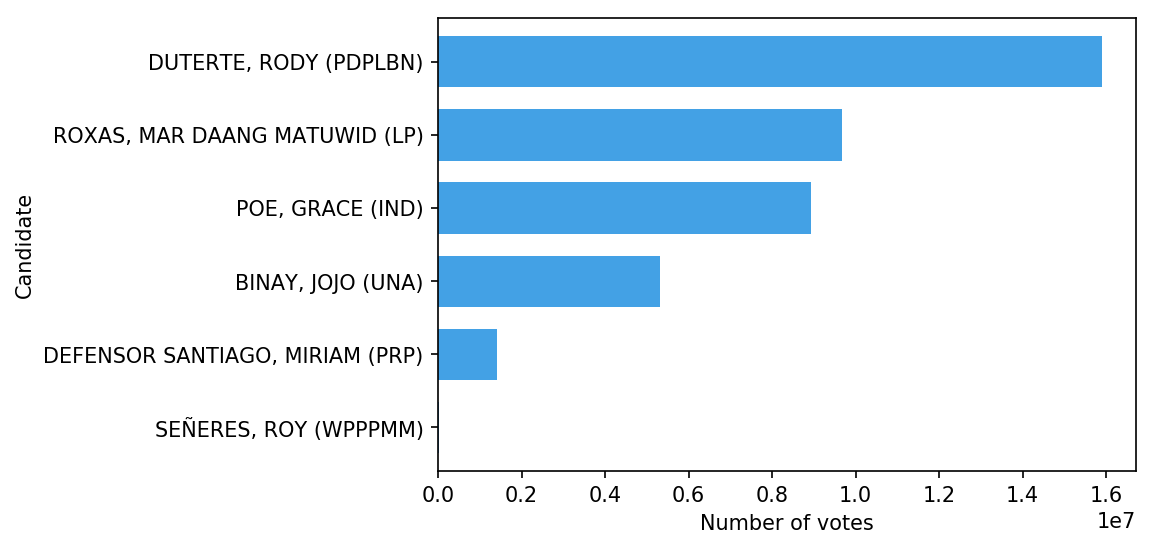

In [223]:
fig, ax = plt.subplots(dpi=150)
df_pres.groupby('candidate_name')['votes'].agg(sum).sort_values(ascending=True).plot(kind='barh', color='#43a1e5', ax=ax, width=0.7)
ax.set_ylabel('Candidate')
ax.set_xlabel('Number of votes');

#### Figure 1. Total votes obtained by each presidential candidate.

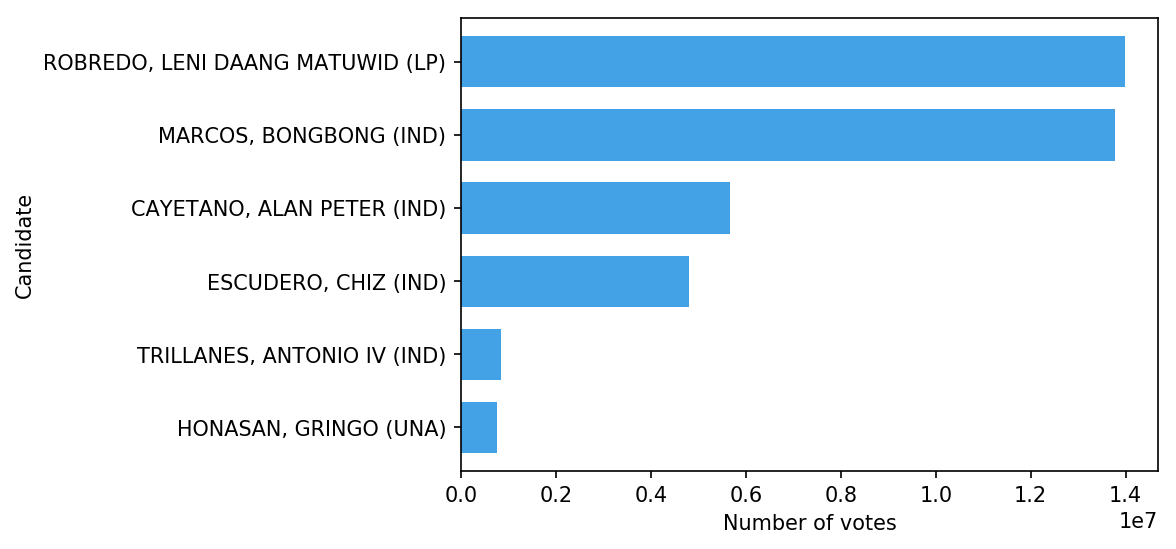

In [224]:
fig, ax = plt.subplots(dpi=150)
df_vp.groupby('candidate_name')['votes'].agg(sum).sort_values(ascending=True).plot(kind='barh', color='#43a1e5', ax=ax, width=0.7)
ax.set_ylabel('Candidate')
ax.set_xlabel('Number of votes');

#### Figure 2. Total votes obtained by each vice-presidential candidate.

## 3. Total Votes per Region

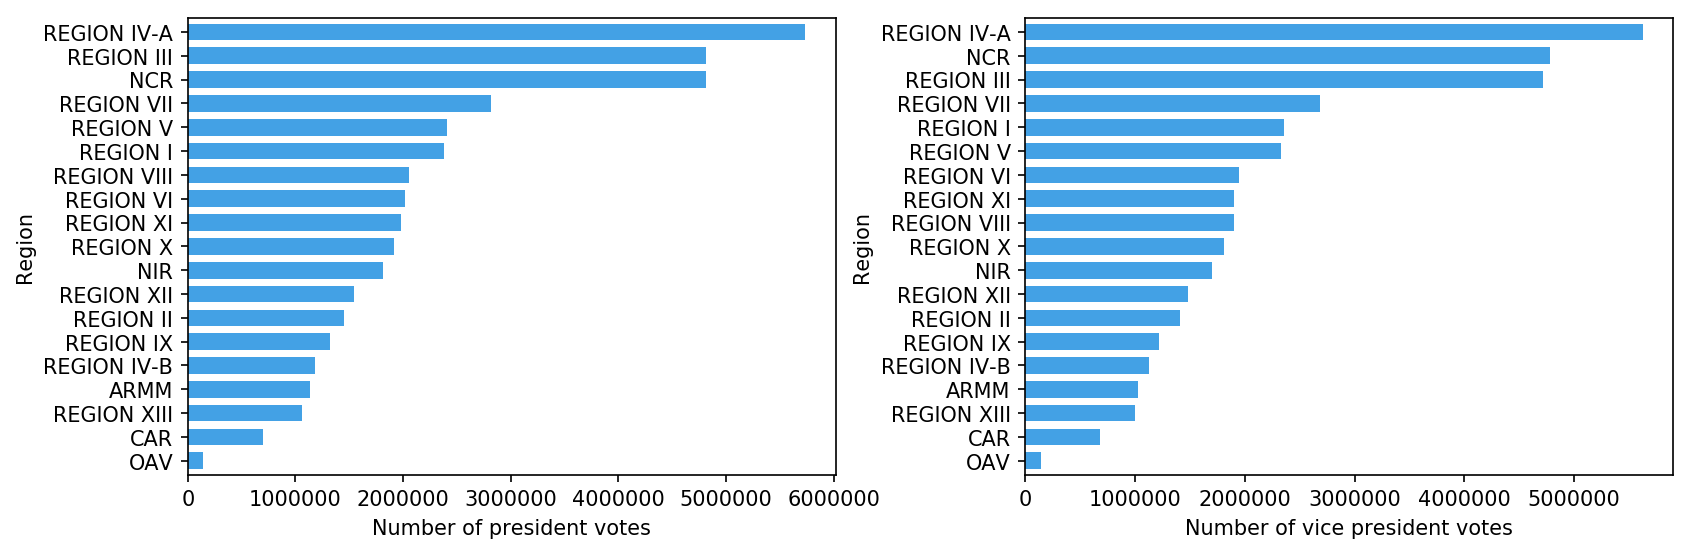

In [231]:
fig, ax = plt.subplots(1, 2, dpi=150, figsize=(12,5))
fig.tight_layout(pad=6.0)
df_pres.groupby('region')['votes'].agg(sum).sort_values(ascending=True).plot(kind='barh', color='#43a1e5', ax=ax[0], width=0.7)
ax[0].set_ylabel('Region')
ax[0].set_xlabel('Number of president votes')
df_vp.groupby('region')['votes'].agg(sum).sort_values(ascending=True).plot(kind='barh', color='#43a1e5', ax=ax[1], width=0.7)
ax[1].set_ylabel('Region')
ax[1].set_xlabel('Number of vice president votes');

#### Figure 3. Total presidential and vice-presidential votes obtained per administrative region. CALABARZON, Central Luzon, and NCR are the most vote-rich regions.

## 4. Total Votes per Province

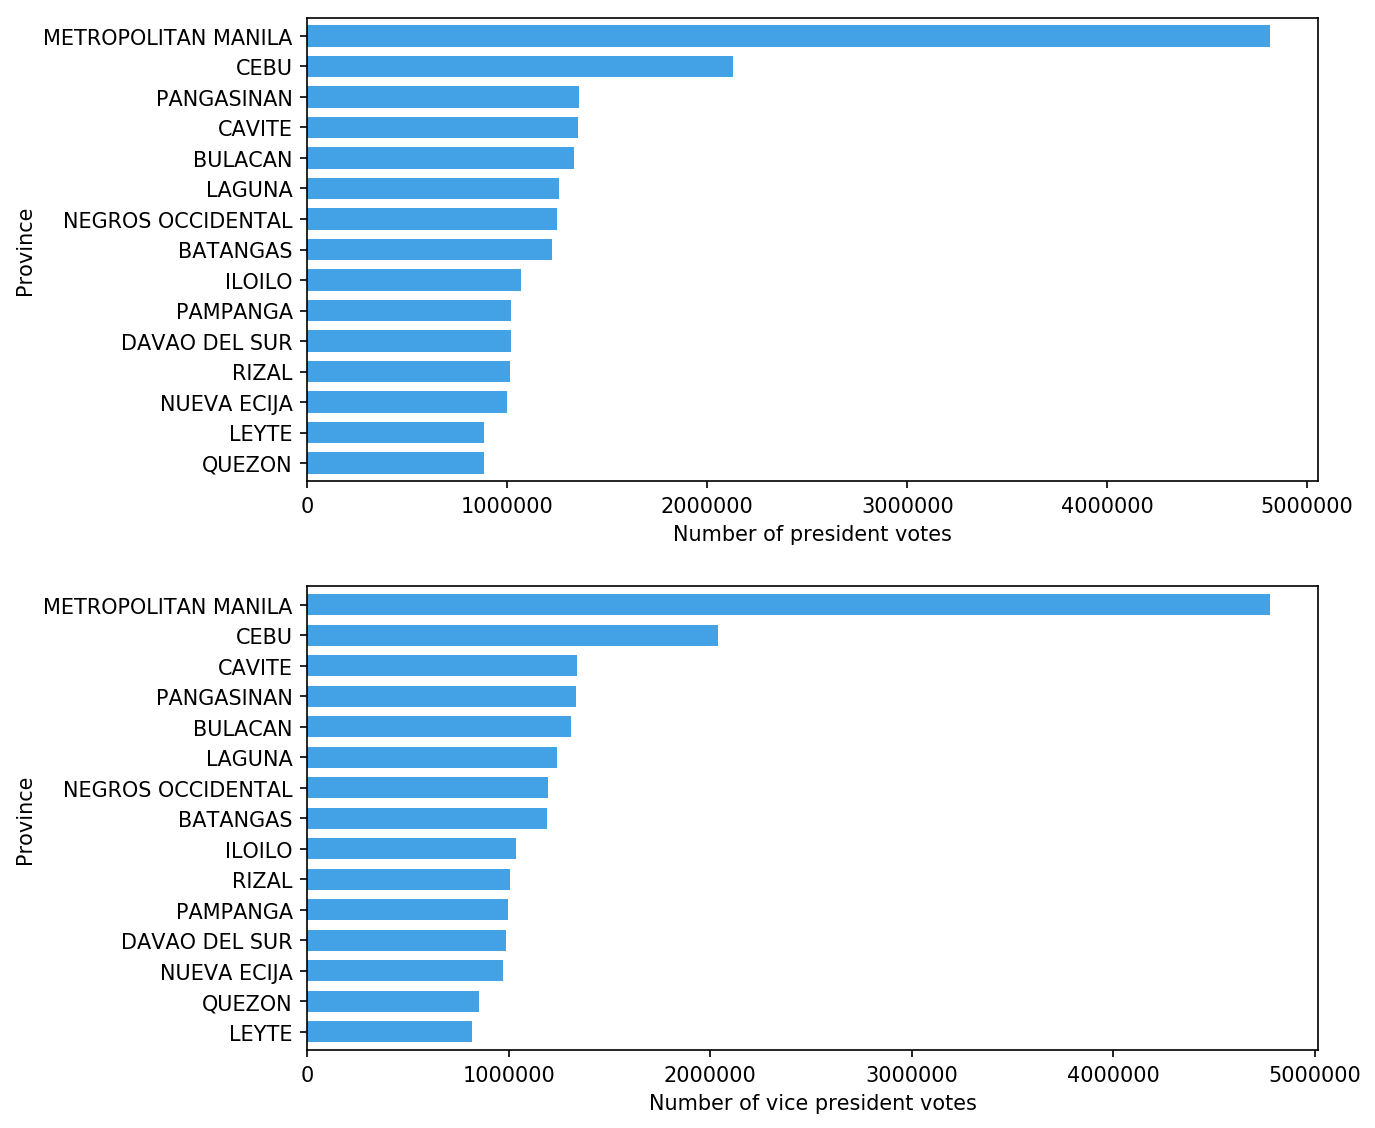

In [232]:
fig, ax = plt.subplots(2, 1, dpi=150, figsize=(8,8))
fig.tight_layout(pad=3.0)
df_pres.groupby('province')['votes'].agg(sum).sort_values(ascending=True)[-15:].plot(kind='barh', color='#43a1e5', ax=ax[0], width=0.7)
ax[0].set_ylabel('Province')
ax[0].set_xlabel('Number of president votes')
df_vp.groupby('province')['votes'].agg(sum).sort_values(ascending=True)[-15:].plot(kind='barh', color='#43a1e5', ax=ax[1], width=0.7)
ax[1].set_ylabel('Province')
ax[1].set_xlabel('Number of vice president votes');

#### Figure 4. Total presidential and vice-presidential votes obtained per province. The most vote-rich provinces are NCR, Cebu, Cavite, and Pangasinan.

In [83]:
def display_ranks(position='president', level='region'):
    """
    Displays the top candidate for each geographic unit. 
    
    position : president/vice-president
    level    : region/province
    """
    with open(f'Datasets/{position}_merged.pkl', 'rb') as f:
        df = pickle.load(f)
    df_ranking = df.groupby([level,'candidate_name']).agg({'votes': sum})
    df_ranking['rank'] = df_ranking.groupby(level)['votes'].rank(method='dense', ascending=False)
    df_ranking.reset_index(inplace=True)
    df_ranking_pivot = df_ranking.pivot(index='candidate_name', columns=level)['rank']
    
    label = {'president': "Presidential",
             'vice-president': "Vice-Presidential"}
    
    if level == 'region':
        fig, ax = plt.subplots(dpi=150, figsize=(8,3))
        sns.heatmap(df_ranking_pivot, ax=ax, cmap='Reds_r', square=True)
        ax.set_xlabel('Region')
        ax.set_ylabel('Candidate')
        ax.set_title(f'{label[position]} Ranking heatmap')
        plt.xticks(rotation=80);
    
    ph = gpd.GeoDataFrame.from_file(f"Datasets/ph_{level}s.shp")
    
    df_top = df_ranking[df_ranking['rank']==1.0]
    df_merged = ph.merge(df_top, left_on=level, right_on=level)
    color_map = {'DUTERTE, RODY (PDPLBN)': 'red',
                 'POE, GRACE (IND)': 'white', 
                 'ROXAS, MAR DAANG MATUWID (LP)': 'yellow', 
                 'BINAY, JOJO (UNA)': 'orange',
                 'ROBREDO, LENI DAANG MATUWID (LP)': 'yellow', 
                 'MARCOS, BONGBONG (IND)': 'green',
                 'CAYETANO, ALAN PETER (IND)': 'red',
                 'ESCUDERO, CHIZ (IND)': 'white'}

    fig, ax = plt.subplots(dpi=150, figsize=(8,10))
    ax.set_title(f'Top {label[position]} candidate per {level}');
    
    df_top.to_csv(f'Datasets/results_{position}_{level}_top.csv')
    
    for candidate in df_merged['candidate_name'].unique():
        df_merged[df_merged['candidate_name'] == candidate].plot(ax=ax, color = color_map[candidate], 
                                          categorical = True, legend=True)

    df_merged.geometry.boundary.plot(color=None,edgecolor='k',linewidth = .5,ax=ax);
    ax.axis('off');
    
    for ind, row in ph.iterrows():
        ax.text(row["geometry"].centroid.x, row["geometry"].centroid.y,
            row[level], fontsize=4);
    

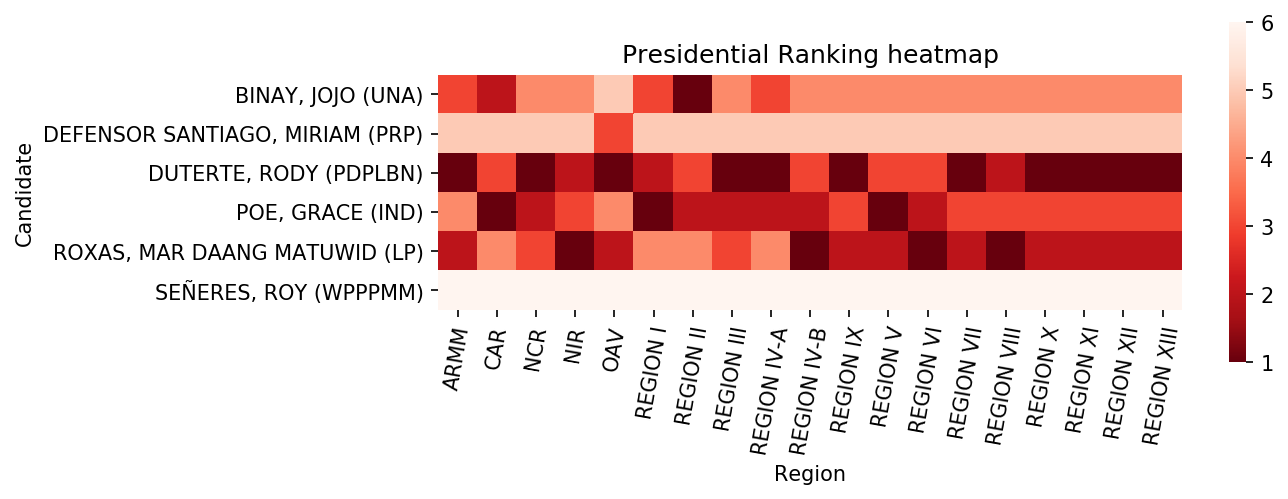

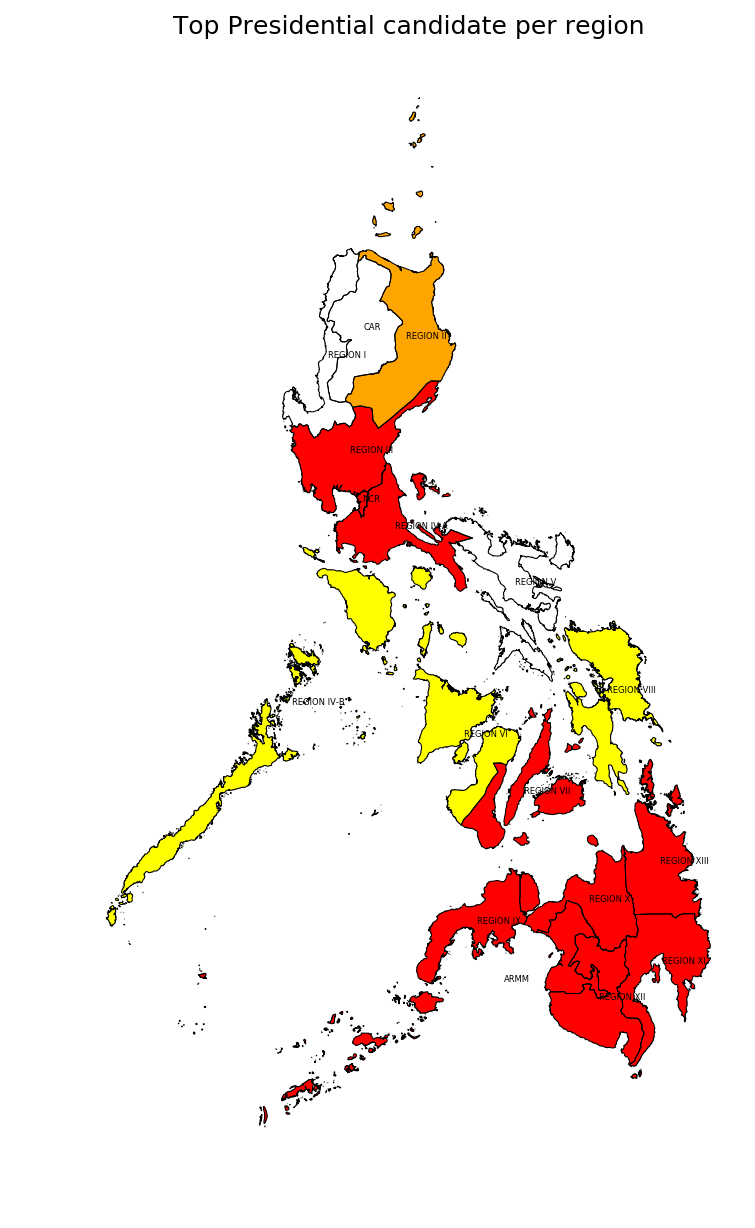

In [84]:
display_ranks('president', 'region')

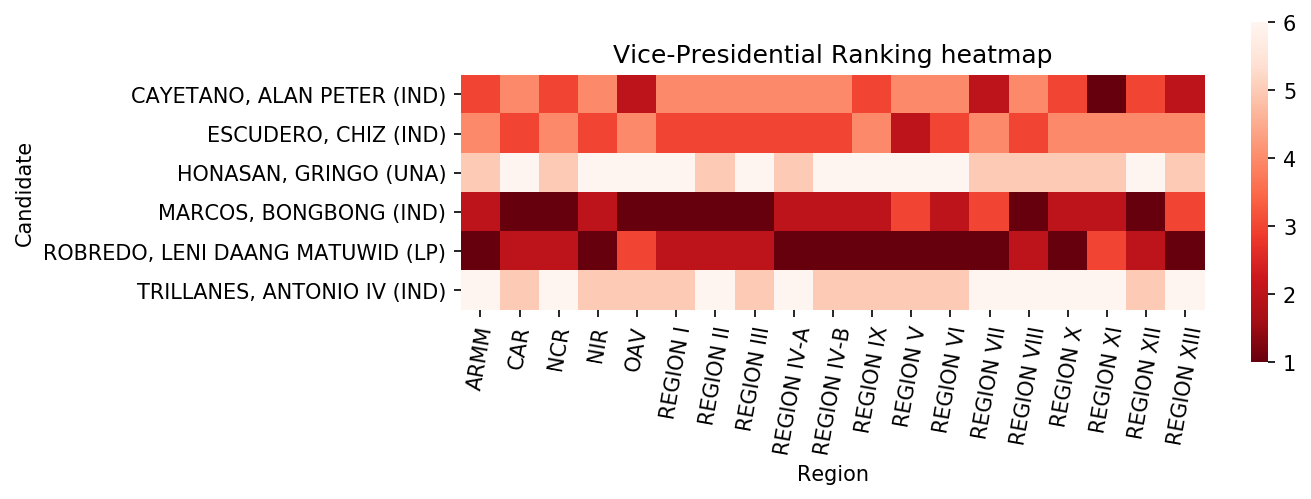

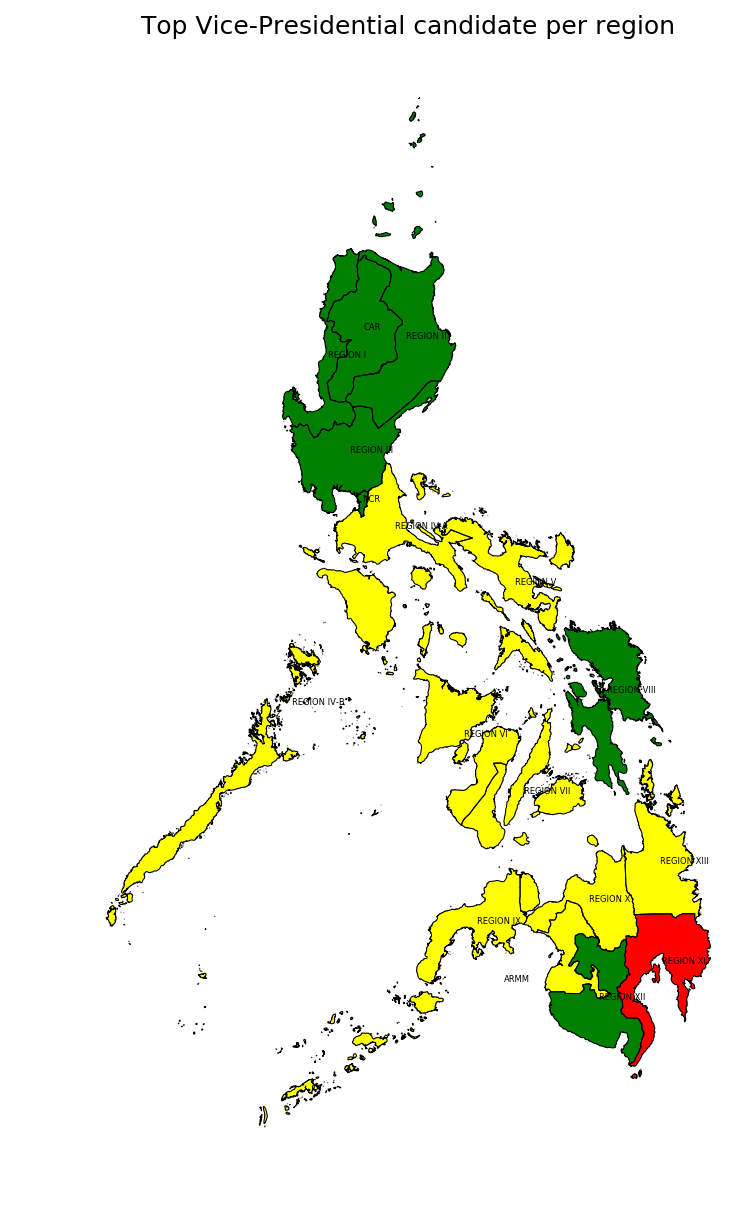

In [85]:
display_ranks('vice-president', 'region')

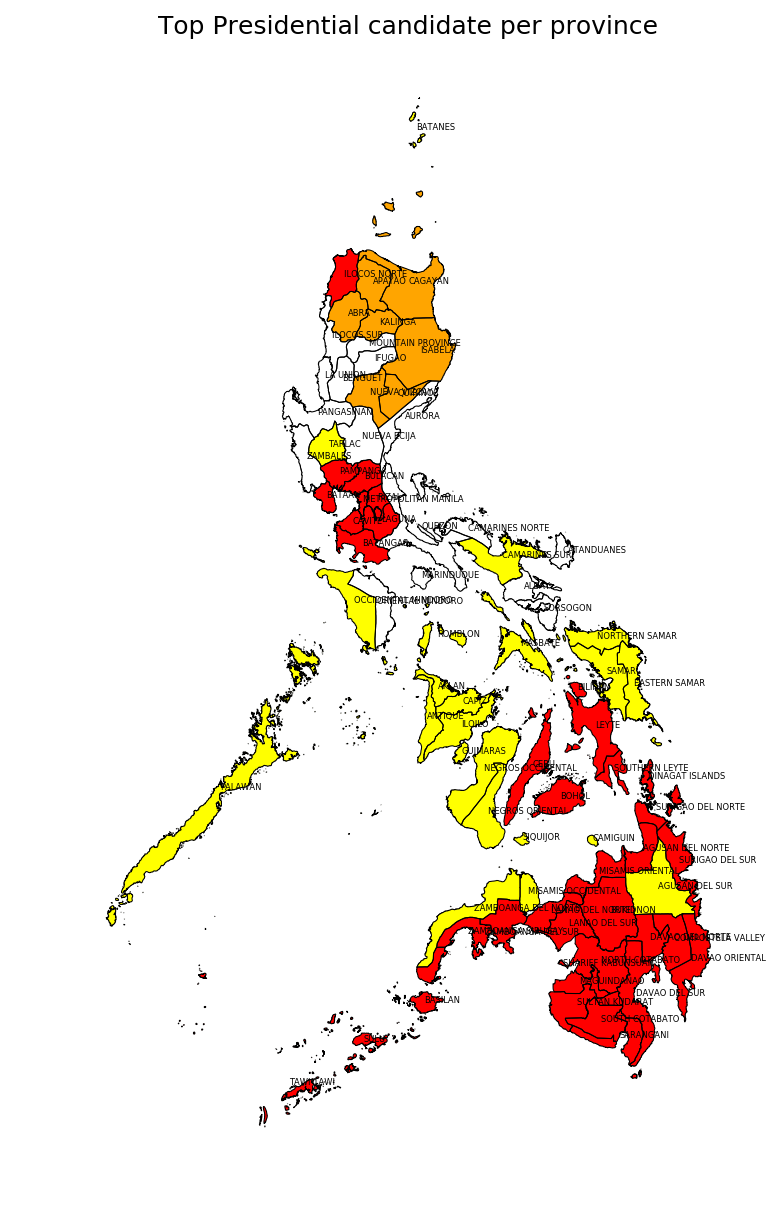

In [86]:
display_ranks('president', 'province')

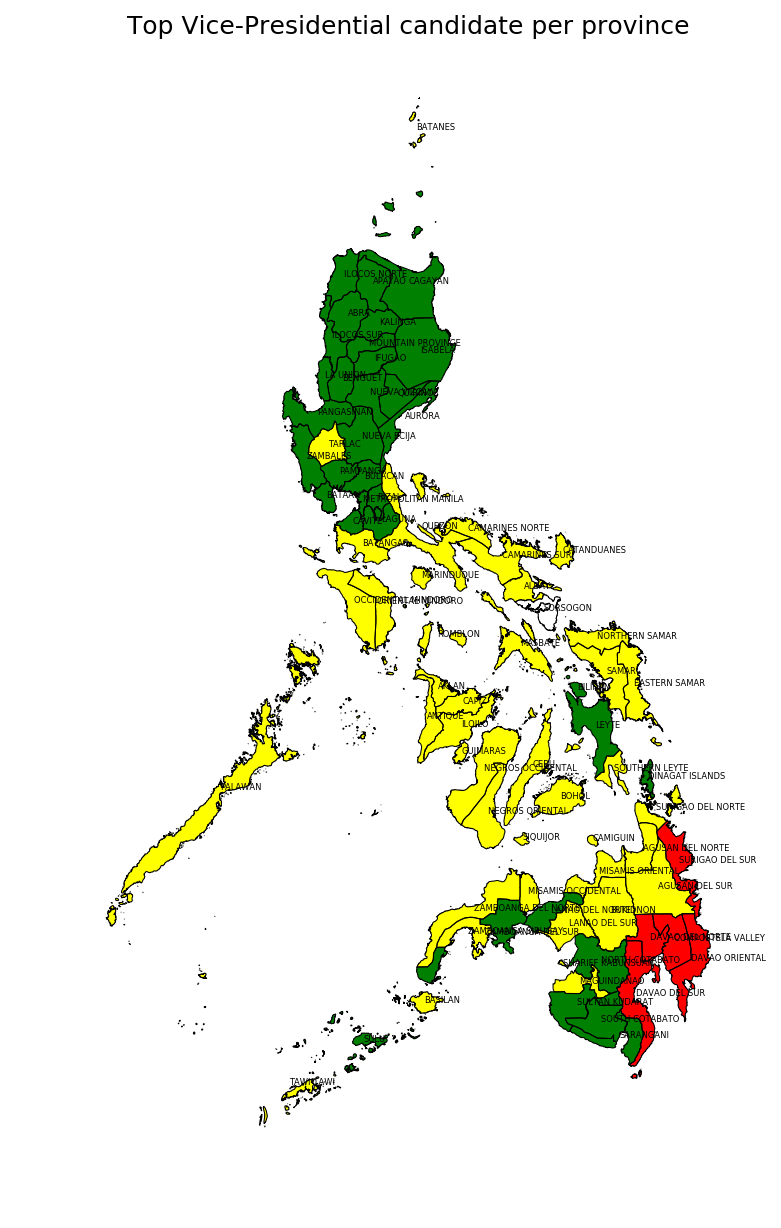

In [87]:
display_ranks('vice-president', 'province')